In [2]:
#RANDOM SAMPLING FOR W SWEEP
from scipy.stats import qmc
import pandas as pd

#No control sampling
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7]
u_bounds = [10E-3, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
nc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':1.})
nc_lhc.to_csv('exp_data/nc_lhc.csv')

#Upstream repression sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
ur_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':1.})
ur_lhc.to_csv('exp_data/ur_lhc.csv')

#Downstream activation sampling
sampler = qmc.LatinHypercube(d=3)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
da_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':1., 'k_miox':sample_scaled[:,1], 'theta_miox':sample_scaled[:,2]})
da_lhc.to_csv('exp_data/da_lhc.csv')

#Dual control sampling
sampler = qmc.LatinHypercube(d=4)
sample = sampler.random(n=500)
l_bounds = [10E-7, 10E-7, 10E-7, 10E-7]
u_bounds = [10E-3, 10, 10E-3, 10]
sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
dc_lhc = pd.DataFrame({'k_ino1':sample_scaled[:,0], 'theta_ino1':sample_scaled[:,1], 'k_miox':sample_scaled[:,2], 'theta_miox':sample_scaled[:,3]})
dc_lhc.to_csv('exp_data/dc_lhc.csv')

In [3]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [11]:
dc_combined = pd.read_csv('exp_data/combined_data/dc/sum_data_dc.csv')

In [16]:
fba = pd.read_csv('exp_data/dc_r/sim_fba_data_dc_r.csv')

In [33]:
small_fba = fba.drop_duplicates(subset=['W']).dropna().reset_index(drop=True)

In [41]:
small_fba['k_ino1'] = [float(small_fba.W[i].split(', ')[2].split(']')[0]) for i in range(len(small_fba))]

In [42]:
small_fba

,time,v_in,lam,W,k_ino1
0,0.0,10.003768,0.878289,"[[2.0, 2.9610060881310254, 0.0046820615718197]...",0.004682
1,0.0,10.003768,0.878289,"[[2.0, 5.448546283383601, 0.0078272444685313],...",0.007827
2,0.0,10.003768,0.878289,"[[2.0, 6.984061542245783, 0.0024107262466112],...",0.002411
3,0.0,10.003768,0.878289,"[[2.0, 0.4997654294095259, 0.0041411035056311]...",0.004141
4,0.0,10.003768,0.878289,"[[2.0, 1.0794037184076912, 0.0016640987494957]...",0.001664
...,...,...,...,...,...
86,0.0,10.003768,0.878289,"[[2.0, 1.644360521138738, 0.0054651882972355],...",0.005465
87,0.0,10.003768,0.878289,"[[2.0, 4.113351108663, 0.0093339609858797], [2...",0.009334
88,0.0,10.003768,0.878289,"[[2.0, 4.8446864654533295, 0.0011140206540156]...",0.001114
89,0.0,10.003768,0.878289,"[[2.0, 5.519844683288414, 0.0057962207516211],...",0.005796


In [48]:
lhc = pd.read_csv("exp_data/dc_lhc_remaining.csv")
lhc.loc[~lhc.k_ino1.isin(list(small_fba.k_ino1))][['k_ino1', 'theta_ino1', 'k_miox', 'theta_miox']].to_csv('exp_data/dc_lhc_rem2.csv')

In [17]:
len(fba.W.unique())

92

In [82]:
#BURDEN COMPUTATION -FIX MEEEEEE
# print("DC")
# burdens1 = []
# burdens2 = []
# for w in fba_data_dc_final.W.unique():
#     fba_data = fba_data_dc_final.loc[fba_data_dc_final.W == w].reset_index(drop=True)
#     burden1 = sum(fba_data.lam[0] - fba_data.lam)
#     burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
#     burdens1.append(burden1)
#     burdens2.append(burden2)

# sum_data_dc_final['sum_burden'] = burdens1
# sum_data_dc_final['delta_burden'] = burdens2

# sum_data_dc_final.to_csv('exp_data/combined_data/sum_data_dc_burden_final.csv')

print("NC")
burdens1 = []
burdens2 = []
for w in fba_data_nc_final.W.unique():
    fba_data = fba_data_nc_final.loc[fba_data_nc_final.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_nc_final['sum_burden'] = burdens1
sum_data_nc_final['delta_burden'] = burdens2

sum_data_nc_final.to_csv('exp_data/combined_data/sum_data_nc_burden_final.csv')

print("DA")
burdens1 = []
burdens2 = []
for w in fba_data_da_final.W.unique():
    fba_data = fba_data_da_final.loc[fba_data_da_final.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_da_final['sum_burden'] = burdens1
sum_data_da_final['delta_burden'] = burdens2

sum_data_da_final.to_csv('exp_data/combined_data/sum_data_da_burden_final.csv')

print('UR')
burdens1 = []
burdens2 = []
for w in fba_data_ur_new.W.unique():
    fba_data = fba_data_ur_new.loc[fba_data_ur_new.W == w].reset_index(drop=True)
    burden1 = sum(fba_data.lam[0] - fba_data.lam)
    burden2 = fba_data.lam[0] - fba_data.lam[len(fba_data)-1]
    burdens1.append(burden1)
    burdens2.append(burden2)

sum_data_ur_new['sum_burden'] = burdens1
sum_data_ur_new['delta_burden'] = burdens2

sum_data_ur_new.to_csv('exp_data/combined_data/sum_data_ur_burden_final.csv')


DC
NC
DA
UR


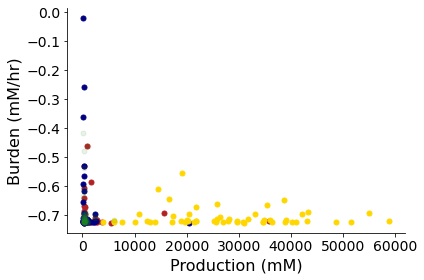

In [83]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_nc.ga_tot, -sum_data_nc.delta_burden, '.', c='firebrick', ms=10)
ax.plot(sum_data_dc.ga_tot, -sum_data_dc.delta_burden, '.', c='navy', ms=10)
ax.plot(sum_data_da.ga_tot, -sum_data_da.delta_burden, '.', c='gold', ms=10)
ax.plot(sum_data_ur.ga_tot, -sum_data_ur.delta_burden, '.', c='forestgreen', ms=10, alpha=0.1)
#ax.set_xlim([0, 3000])
fig.tight_layout()


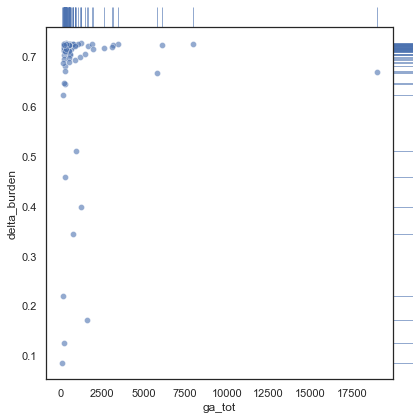

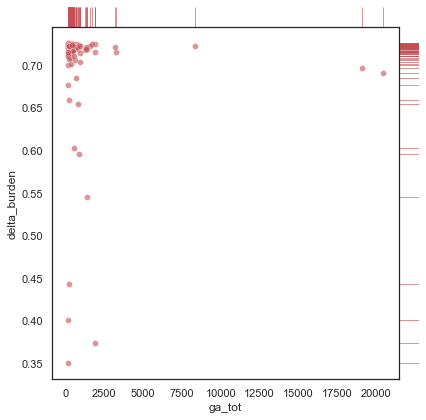

In [30]:
import seaborn as sns

g = sns.JointGrid(data=sum_data_dc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

g = sns.JointGrid(data=sum_data_nc, x="ga_tot", y="delta_burden", space=0, ratio=17)
g.plot_joint(sns.scatterplot,
             color="r", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="r", alpha=.6)